***Problem Statement:***

Big Basket, a food delivery service operating in multiple countries, aims to improve the overall customer experience by analysing the ratings provided by its customers. The target variable in this problem is the rating given by the customers after they receive their food delivery. The company wants to understand the factors that influence the customers' ratings and identify the areas that need improvement.
The challenge for Big Basket is to collect and analyse the ratings data from multiple countries, as customer preferences and expectations may vary across different regions. Additionally, the company needs to develop a system that can capture the feedback from customers in a timely and efficient manner to ensure that the issues are addressed promptly.
Thus, the problem statement for Big Basket is to develop a data-driven approach to understand the factors influencing customer ratings across different countries, and to use this information to enhance the overall customer experience by addressing the areas that require improvement.

**Description of Data:**

• Restaurant Id: Unique id of every restaurant across various cities of the     world
• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant's location

• Latitude: Latitude coordinate of the restaurant's location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies 
• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating colour: depending upon the average rating colour

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people


In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [237]:
df = pd.read_csv('/content/Big Basket Food Delivery.csv',encoding='latin-1')

In [238]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [239]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [240]:
df.shape

(9551, 21)

In [241]:
df.size

200571

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9550 non-null   object 
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [243]:
df['Price range'].unique()

array(['3', '4', '2', '1', '*', nan, '456', '5672', '3454', '5552',
       '6782', '4533', '5666'], dtype=object)

In [244]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [245]:
df['Average Cost for two'].unique()

array(['1100', '1200', '4000', '1500', '1000', '2000', '6000', '800',
       '900', '700', '850', '600', '?', '3000', '1800', '55', '30', '45',
       '60', '50', '80', '90', '200', '150', '100', '230', '240', '350',
       '140', '170', '120', '250', '40', '70', '300', '85', '75', '400',
       '65', '25', '10', '0', nan, '20', '35', '&', '7', '*', '270',
       '500', '430', '315', '220', '95', '190', '260', '180', '330',
       '280', '160', '285', '130', '110', '2500', '3600', '550', '450',
       '950', '650', '1300', '2400', '1400', '1600', '2200', '750',
       '1700', '1250', '1900', '2700', '3500', '5000', '2300', '1750',
       '3200', '2100', '1850', '4500', '3300', '1350', '1650', '1950',
       '1050', '290', '1450', '2800', '3650', '4800', '1550', '720',
       '6500', '7000', '1150', '2900', '2600', '4700', '3700', '3800',
       '4100', '4300', '2650', '5100', '5500', '4400', '4200', '8000',
       '2350', '150000', '70000', '250000', '200000', '165000', '800000',
     

In [246]:
df["Aggregate rating"].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

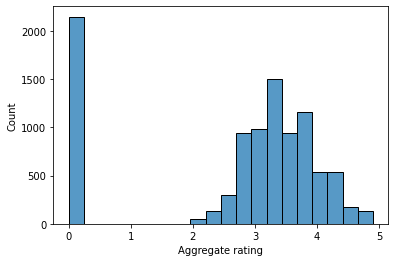

In [247]:
sns.histplot(x='Aggregate rating', data=df, bins=20)
plt.show()

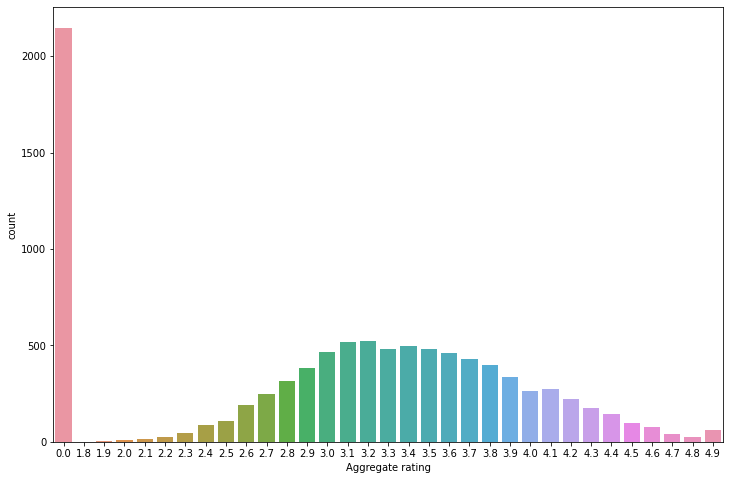

In [248]:
plt.figure(figsize=(12,8))
sns.countplot(x='Aggregate rating', data=df)
plt.show()

<Axes: xlabel='Rating color', ylabel='count'>

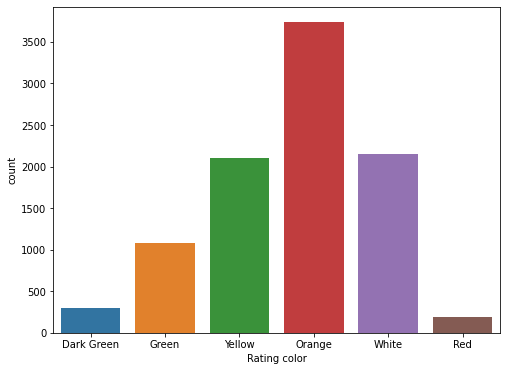

In [249]:
plt.figure(figsize=(8,6))
sns.countplot(x='Rating color',data=df)


In [250]:
df['Price range'].value_counts()

1       4443
2       3107
3       1407
4        584
*          1
456        1
5672       1
3454       1
5552       1
6782       1
4533       1
5666       1
Name: Price range, dtype: int64

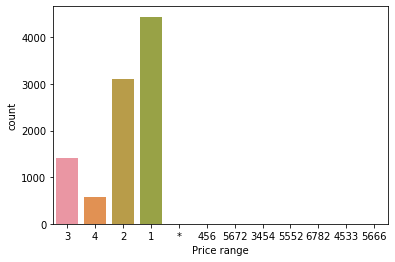

In [251]:
sns.countplot(x='Price range', data=df)
plt.show()


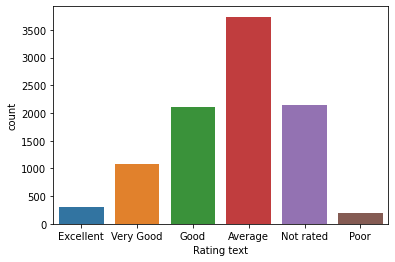

In [252]:
sns.countplot(x='Rating text', data=df)
plt.show()


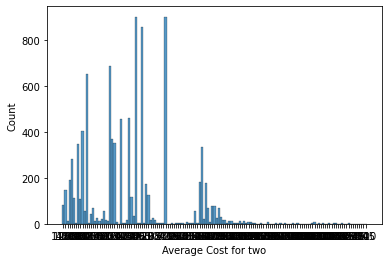

In [253]:
sns.histplot(df['Average Cost for two'])
plt.show()

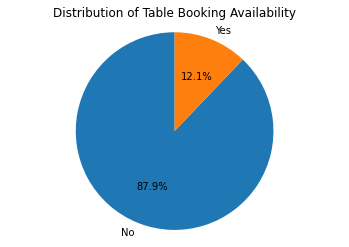

In [254]:
table_booking = df['Has Table booking'].value_counts()
plt.pie(table_booking.values, labels=table_booking.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Table Booking Availability')
plt.show()


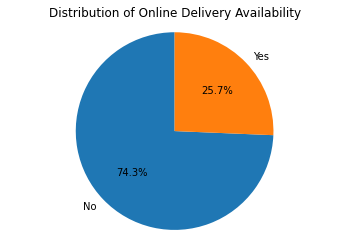

In [255]:
online_delivery = df['Has Online delivery'].value_counts()
plt.pie(online_delivery.values, labels=online_delivery.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Online Delivery Availability')
plt.show()


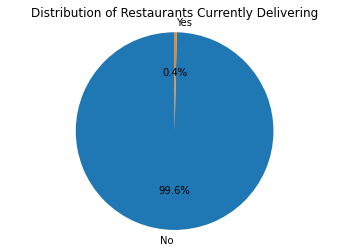

In [256]:
delivering_now = df['Is delivering now'].value_counts()
plt.pie(delivering_now.values, labels=delivering_now.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Restaurants Currently Delivering')
plt.show()


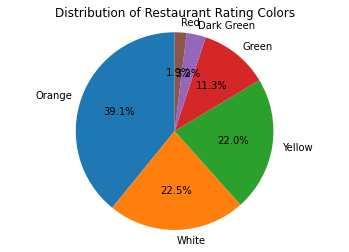

In [257]:
rating_colors = df['Rating color'].value_counts()
plt.pie(rating_colors.values, labels=rating_colors.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Restaurant Rating Colors')
plt.show()


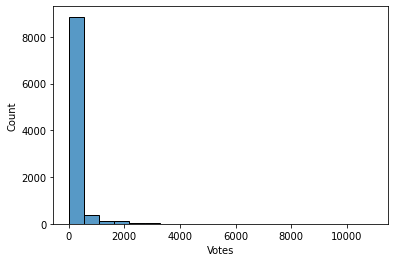

In [258]:
sns.histplot(x='Votes', data=df, bins=20)
plt.show()


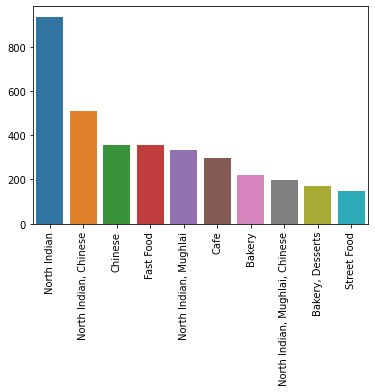

In [259]:
top_cuisines = df['Cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
plt.xticks(rotation=90)
plt.show()


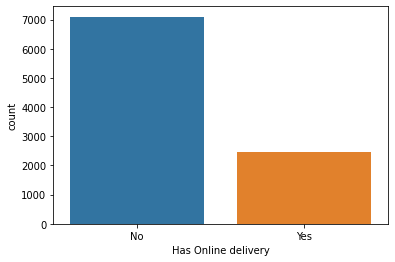

In [260]:
sns.countplot(x='Has Online delivery', data=df)
plt.show()

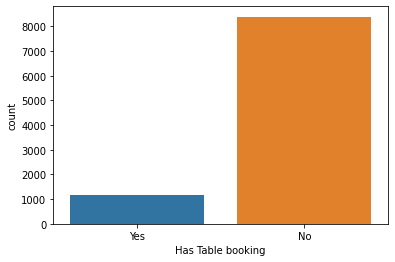

In [261]:
sns.countplot(x='Has Table booking', data=df)
plt.show()

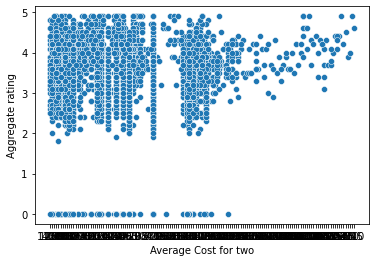

In [262]:
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.show()


In [263]:
categorical = ['City','Address','Locality','Locality Verbose','Cuisines','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Currency','Price range','Rating color','Rating text']

In [264]:
for i in categorical:
  df[i] = df[i].astype('category').cat.codes

In [265]:
pd.set_option('display.max_columns', 500)

In [266]:
df[df['Average Cost for two']=='?']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
19,6308205,Wildflour Cafe + Bakery,162,123,5412,132,133,121.046220,14.549337,345,?,0,1,0,0,0,5,4.4,1,5,392
9542,5926979,Leman Kí_ltí_r,208,140,4259,503,509,29.022805,40.989705,1657,?,11,0,0,0,0,3,3.7,5,2,506


In [267]:
df = df.replace('?',np.nan)

In [268]:
df = df.replace('&',np.nan)

In [269]:
df = df.replace('*',np.nan)

In [270]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                      int16
Address                   int16
Locality                  int16
Locality Verbose          int16
Longitude               float64
Latitude                float64
Cuisines                  int16
Average Cost for two     object
Currency                   int8
Has Table booking          int8
Has Online delivery        int8
Is delivering now          int8
Switch to order menu       int8
Price range                int8
Aggregate rating        float64
Rating color               int8
Rating text                int8
Votes                     int64
dtype: object

In [271]:
df['Average Cost for two'] = df['Average Cost for two'].astype(float)

In [272]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                      int16
Address                   int16
Locality                  int16
Locality Verbose          int16
Longitude               float64
Latitude                float64
Cuisines                  int16
Average Cost for two    float64
Currency                   int8
Has Table booking          int8
Has Online delivery        int8
Is delivering now          int8
Switch to order menu       int8
Price range                int8
Aggregate rating        float64
Rating color               int8
Rating text                int8
Votes                     int64
dtype: object

In [273]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [274]:
df['Average Cost for two'] = df['Average Cost for two'].fillna(df['Average Cost for two'].median())

In [275]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

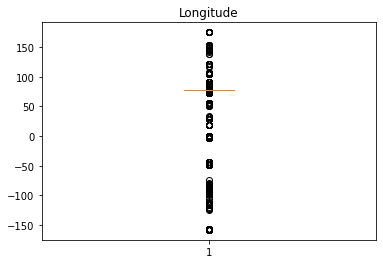

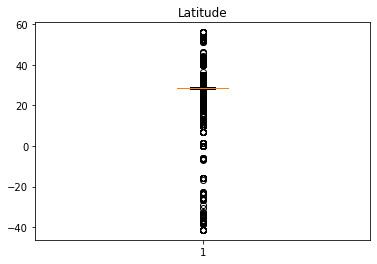

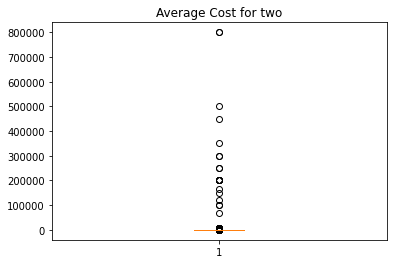

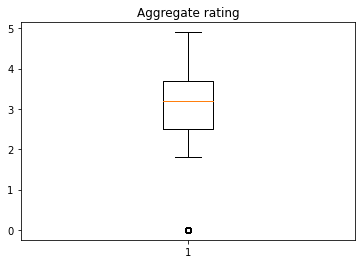

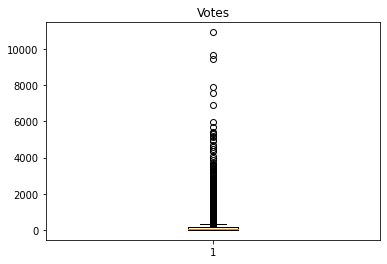

In [276]:
num_cols = ['Longitude','Latitude','Average Cost for two','Aggregate rating','Votes']
for i in num_cols:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show() 
    

In [277]:
df[num_cols].describe()

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,64.126574,25.854381,1199.013925,2.666370,168.055910
std,41.467058,11.007935,16121.176991,1.516378,458.923467
min,-157.948486,-41.330428,0.000000,0.000000,0.000000
25%,77.081343,28.478713,250.000000,2.500000,5.000000
50%,77.191964,28.570469,400.000000,3.200000,31.000000
75%,77.282006,28.642758,700.000000,3.700000,134.500000
max,174.832089,55.976980,800000.000000,4.900000,10934.000000


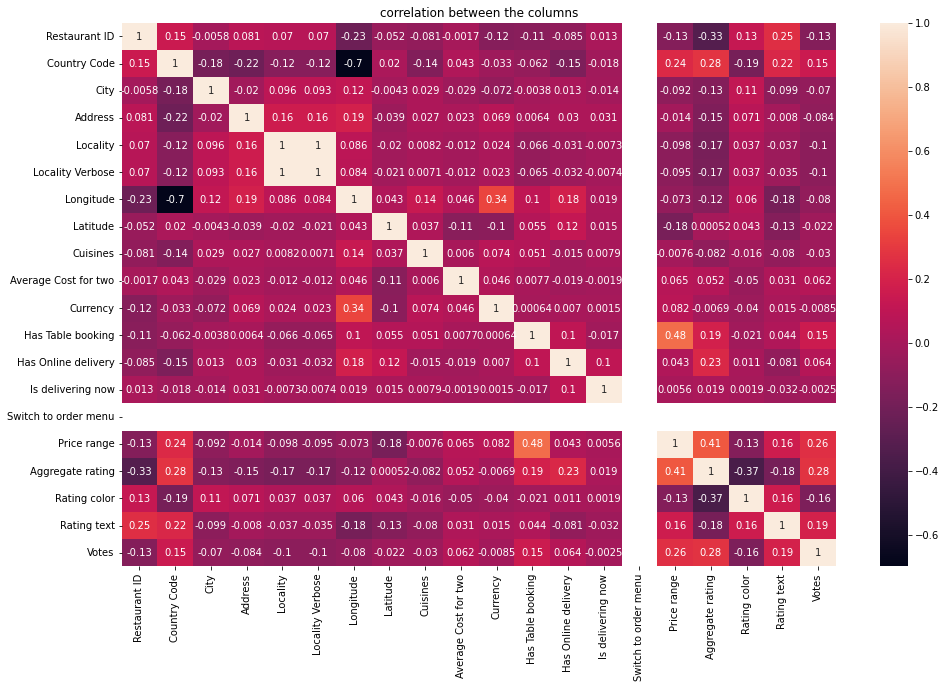

In [278]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.title('correlation between the columns')
plt.show()

In [281]:
df = df.drop(['Locality Verbose'],axis=1)